In [1]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_x= np.load("temp/train_data.npy")
train_y= np.load("temp/train_labels.npy")
test_x= np.load("temp/test_data.npy")
test_y= np.load("temp/test_labels.npy")

In [3]:
np.shape(train_x),np.shape(test_x)

((7500, 784), (1000, 784))

In [11]:
np.unique(train_y, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}


In [12]:
np.unique(train_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([750, 750, 750, 750, 750, 750, 750, 750, 750, 750]))

In [18]:
def shower( data):
    plt.axis('off')
    plt.imshow( data.reshape( 28, 28))
    plt.show()
    return

def vis( index, dataset= 'train'):
    if dataset == 'train':
        data= train_x[ index]
        label= train_y[ index]
    else:
        data= test_x[ index]
        label= test_y[ index]
    print('Digit is ' + str(label))
    shower( data)
    return  

Digit is 0


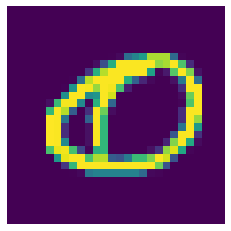

In [22]:
vis( 0, 'test')

In [23]:
def euc_dist( x, y):
    return np.sum( np.square( x - y))

In [24]:
euc_dist( train_x[4], train_x[5])

5357193.0

In [38]:
def nn( index):
    dist= [ euc_dist( test_x[ index], i) for i in train_x]
    #vis( index, 'test')
    pred= train_y[np.argmin( dist)]
    #print( 'Classified as ' + str( pred))
    return pred

Digit is 3


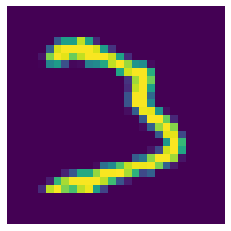

Classified as 2


In [35]:
nn( 39)

In [39]:
start= time.time()

preds= [ nn(i) for i in range( len( test_y))]
errs= np.not_equal( preds, test_y)


TypeError: can only concatenate str (not "numpy.float64") to str

In [40]:
print( 'Finished in ' + str( time.time() - start) + ' with error of ' + str(np.sum( errs)/len( test_y)))

Finished in 101.70613288879395 with error of 0.046


In [43]:
labels= [ b'NO', b'DH', b'SL']
data= np.loadtxt( 'NN_spine/column_3C.dat', converters= {6: lambda s: labels.index(s)})

In [48]:
x= data[ :, 0:6]
y= data[ :, 6]
training_indices = list(range(0,20)) + list(range(40,188)) + list(range(230,310))
test_indices = list(range(20,40)) + list(range(188,230))

trainx = x[training_indices,:]
trainy = y[training_indices]
testx = x[test_indices,:]
testy = y[test_indices]

In this exercise we will build a nearest neighbor classifier based on L2 (*Euclidean*) distance.

<font color="magenta">**For you to do:**</font> Write a function, **NN_L2**, which takes as input the training data (`trainx` and `trainy`) and the test points (`testx`) and predicts labels for these test points using 1-NN classification. These labels should be returned in a `numpy` array with one entry per test point. For **NN_L2**, the L2 norm should be used as the distance metric.


<font  style="color:blue"> **Code**</font>
```python
# test function 
testy_L2 = NN_L2(trainx, trainy, testx)
print( type( testy_L2) )
print( len(testy_L2) )
print( testy_L2[40:50] )
```

<font  style="color:magenta"> **Output**</font>
```
<class 'numpy.ndarray'>
62
[ 2.  2.  1.  0.  0.  0.  0.  0.  0.  0.]
```


In [66]:
def NN_L2( trainx, trainy, testx):
    preds= []
    for test in testx:
        l2= lambda x, y: np.sqrt( np.sum(np.square( x -y)))
        preds.append( trainy[np.argmin([ l2( test, train) 
                                        for train in trainx])])
    return np.array( preds)

def NN_L1( trainx, trainy, testx):
    preds= []
    for test in testx:
        l2= lambda x, y: np.sum(np.abs( x -y))
        preds.append( trainy[np.argmin([ l2( test, train) 
                                        for train in trainx])])
    return np.array( preds)

In [62]:
testy_L2 = NN_L2(trainx, trainy, testx)

assert( type( testy_L2).__name__ == 'ndarray' )
assert( len(testy_L2) == 62 ) 
assert( np.all( testy_L2[50:60] == [ 0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  0.] )  )
assert( np.all( testy_L2[0:10] == [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.] ) )

In [67]:
testy_L1 = NN_L1(trainx, trainy, testx)
testy_L2 = NN_L2(trainx, trainy, testx)

assert( type( testy_L1).__name__ == 'ndarray' )
assert( len(testy_L1) == 62 ) 
assert( not all(testy_L1 == testy_L2) )
assert( all(testy_L1[50:60]== [ 0.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.]) )
assert( all( testy_L1[0:10] == [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]) )

In [68]:
type(testy)

numpy.ndarray

In [89]:
def confusion(testy,testy_fit):
    # inputs: the correct labels, the fitted NN labels 
    # output: a 3x3 np.array representing the confusion matrix as above
    
    ### BEGIN SOLUTION
    testy.astype( 'int')
    testy_fit.astype( 'int')
    matrix= np.zeros( (3, 3))
    for index, value in enumerate(testy):
        matrix[ value, testy_fit[ index]]+= 1

    return matrix
            
    ### END SOLUTION

In [90]:
L1_neo = confusion(testy, testy_L1) 
assert( type(L1_neo).__name__ == 'ndarray' )
assert( L1_neo.shape == (3,3) )
assert( np.all(L1_neo == [[ 16.,  2.,  2.],[ 10.,  10.,  0.],[ 0.,  0.,  22.]]) )
L2_neo = confusion(testy, testy_L2)  
assert( np.all(L2_neo == [[ 17.,  1.,  2.],[ 10.,  10.,  0.],[ 0.,  0.,  22.]]) )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [93]:
testy.astype( int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
a[0][2]

3